In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
import math

from sklearn.model_selection import train_test_split
import keras

%matplotlib inline
sns.set_style('white')

In [2]:
data=pd.read_csv('train.csv',encoding='utf-8')
labels=pd.read_csv('labels.csv',encoding='utf-8')

In [3]:
data.head()

ALP   ALT    AST  Age   Albumin        BUN  Bilirubin  Cholesterol  \
0   77.0  31.0   46.0   54  2.973333  10.500000        0.7        154.0   
1   77.0  31.0   46.0   76  2.973333  18.333333        0.7        154.0   
2  116.0  83.0  199.5   44  2.500000   4.666667        2.9        154.0   
3  105.0  12.0   15.0   68  4.400000  17.666667        0.2        154.0   
4   77.0  31.0   46.0   88  3.300000  35.000000        0.7        154.0   

   Creatinine    DiasABP  ...   RespRate       SaO2      SysABP       Temp  \
0    0.750000  58.795833  ...  17.428571  97.250000  116.891892  37.357143   
1    1.100000  58.897059  ...  19.000000  96.833333  113.411765  36.939130   
2    0.333333  67.125000  ...  19.000000  95.000000  125.687500  37.800000   
3    0.766667  58.795833  ...  15.457627  97.250000  116.891892  36.223077   
4    1.000000  58.795833  ...  19.166667  97.250000  116.891892  36.880000   

   TroponinI  TroponinT       Urine        WBC     Weight        pH  
0        2.1       0.14  171.052632  10.300000  80.060976  7.387273  
1        2.1       0.14  151.560976  11.266667  80.670588  7.395000  
2        2.1       0.14  124.951219   4.700000  56.700000  7.495000  
3        2.1       0.14  545.833333   9.400000  84.600000  7.387273  
4        2.1       0.14   62.131579   4.300000  80.060976  7.387273  

[5 rows x 42 columns]

In [4]:
labels.head()

In-hospital_death
0                  0
1                  0
2                  0
3                  0
4                  0

In [5]:
data.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [6]:
data.shape

(3999, 42)

In [7]:
labels.shape

(3999, 1)

In [8]:
labels["In-hospital_death"].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [9]:
new=pd.concat([data,labels],axis=1)
print(new)

        ALP      ALT          AST  Age   Albumin        BUN  Bilirubin  \
0      77.0    31.00    46.000000   54  2.973333  10.500000   0.700000   
1      77.0    31.00    46.000000   76  2.973333  18.333333   0.700000   
2     116.0    83.00   199.500000   44  2.500000   4.666667   2.900000   
3     105.0    12.00    15.000000   68  4.400000  17.666667   0.200000   
4      77.0    31.00    46.000000   88  3.300000  35.000000   0.700000   
...     ...      ...          ...  ...       ...        ...        ...   
3994   82.0    32.25    49.000000   70  3.000000  16.000000   0.700000   
3995   82.0    32.25    49.000000   25  3.000000   4.400000   0.700000   
3996   51.0    20.00    20.000000   44  3.000000   7.750000   0.500000   
3997  169.0  1971.00  1685.333333   37  3.100000  89.250000   0.733333   
3998   44.0    18.50   126.000000   78  2.200000  20.166667   0.600000   

      Cholesterol  Creatinine    DiasABP  ...       SaO2      SysABP  \
0           154.0    0.750000  58.79583

<AxesSubplot:>

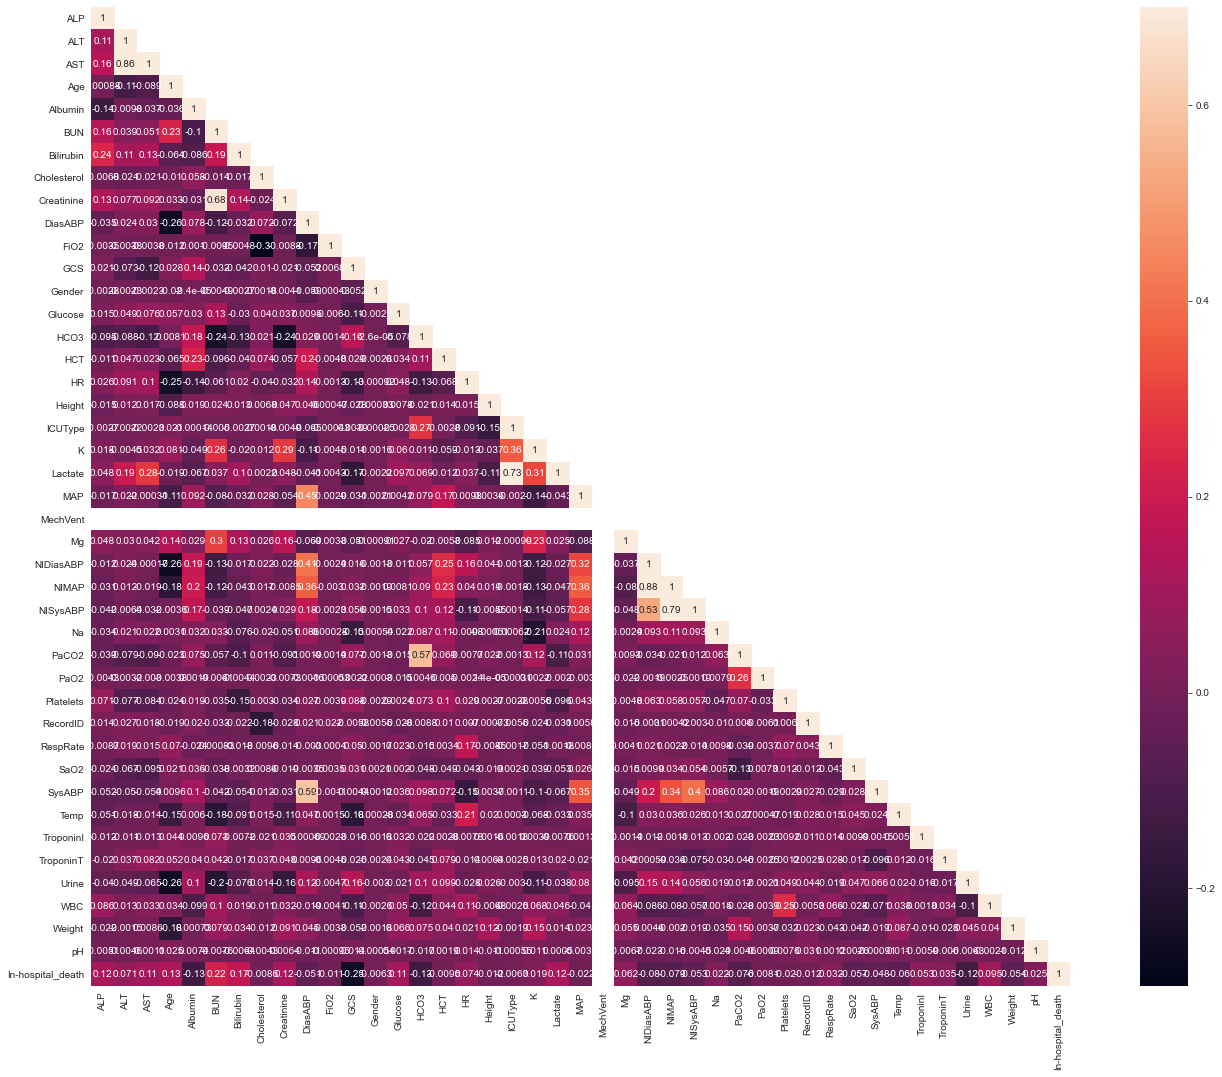

In [10]:
correlation_map = new[new.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(25,18)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [11]:
data=data.drop(['Gender','Cholesterol','HCT','ICUType','Height'],axis=1)

<AxesSubplot:xlabel='In-hospital_death', ylabel='count'>

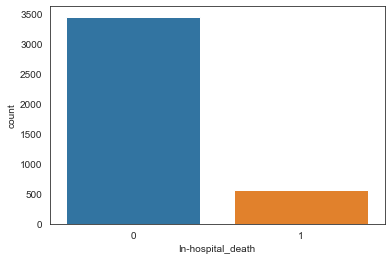

In [12]:
sns.countplot(labels["In-hospital_death"])

In [13]:
X=data
y=labels

In [14]:
print(X.shape,y.shape)

(3999, 37) (3999, 1)


In [15]:
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size = 0.2)

In [16]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=32)  
classifier.fit(X_train, y_train)

LogisticRegression(random_state=32)

In [17]:
y_pred= classifier.predict(X_test)  


<AxesSubplot:>

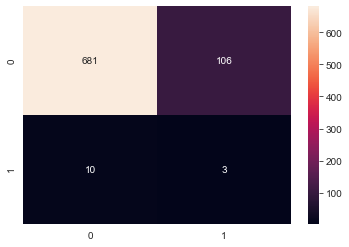

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [19]:
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.855
